In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sum
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ChurnDataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
def categorical_var(df):
    cate_var = []
    for col in df.columns:
        if df[col].dtype == 'O':
            cate_var.append(col)
    return cate_var

In [8]:
categorical_var(df)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [9]:
# Or
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
# Or 
cate_variable = [col for col in df.columns if df[col].dtypes == 'O']
cate_variable

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
num_var = [col for col in df.columns if not col in cate_variable]
num_var

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [12]:
df['tenure'].mean()

32.37114865824223

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Check Missing Values with Empty
empty_id = []
for col in cate_variable + num_var:
    empty_counts = df[col].value_counts().get('' or ' ')
    empty_indexs = df[df[col] == ' '].index
    if empty_counts is not None:
        print(f"Empty values in {col}: {empty_counts}, indexs = {list(empty_indexs)}" )
        empty_id = empty_id+list(empty_indexs)
    else: print(f"Empty values in {col}: 0")

Empty values in customerID: 0
Empty values in gender: 0
Empty values in Partner: 0
Empty values in Dependents: 0
Empty values in PhoneService: 0
Empty values in MultipleLines: 0
Empty values in InternetService: 0
Empty values in OnlineSecurity: 0
Empty values in OnlineBackup: 0
Empty values in DeviceProtection: 0
Empty values in TechSupport: 0
Empty values in StreamingTV: 0
Empty values in StreamingMovies: 0
Empty values in Contract: 0
Empty values in PaperlessBilling: 0
Empty values in PaymentMethod: 0
Empty values in TotalCharges: 11, indexs = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
Empty values in Churn: 0
Empty values in SeniorCitizen: 0
Empty values in tenure: 0
Empty values in MonthlyCharges: 0


In [15]:
data = df.copy()

In [16]:
data1 = data.drop(empty_id, axis=0).reset_index()

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [18]:
data1['tenure'] =data1['tenure'].replace({0:30})

In [19]:
data1['TotalCharges'] = data1['TotalCharges'].astype(float)

In [20]:
data1.describe()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,32.421786,64.798208,2283.300441
std,2032.832448,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1762.750000,0.000000,9.000000,35.587500,401.450000
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000
75%,5282.250000,0.000000,55.000000,89.862500,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [21]:
col = ['TotalCharges', 'MonthlyCharges', 'tenure']
data2 = data1[col]

<Axes: >

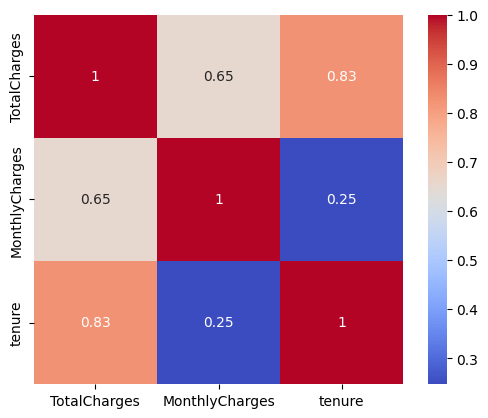

In [22]:
sns.heatmap(data2.corr(method="pearson"), annot=True, square=True, cmap='coolwarm')

In [23]:
y = data2.TotalCharges
x = data2.drop(columns=['TotalCharges'], axis=1)

In [24]:
data2.shape

(7032, 3)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

l1 = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
l1.fit(x_train, y_train)

LinearRegression()

In [26]:
l1.score(x_test, y_test)

0.9004783340563838

In [27]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Use linear Regression to fill out the empty value row by using tenure and monthly charge

In [28]:
replace = np.array([[52.55 ,30],[20.25 ,30],[80.85,30],[25.75,30], [56.05,30],[19.85,30],[25.35,30],
           [20.00 ,30],[ 19.70,30],[73.35,30],[61.90,30]])
replacement_list = l1.predict(replace)

In [29]:
replacement_list

array([1688.90528601,  535.44007572, 2699.52650741,  731.85056045,
       1813.89377629,  521.15567683,  717.56616156,  526.51232642,
        515.79902725, 2431.69402824, 2022.80311004])

In [30]:
empty_indices = df[df['TotalCharges'] == ' '].index
df.loc[empty_indices, 'TotalCharges'] = replacement_list

In [31]:
replacement_list[:len(empty_indices)]

array([1688.90528601,  535.44007572, 2699.52650741,  731.85056045,
       1813.89377629,  521.15567683,  717.56616156,  526.51232642,
        515.79902725, 2431.69402824, 2022.80311004])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Check duplicate

In [34]:
duplicated_row = df[df.duplicated()]

if len(duplicated_row) > 0:
    print(f"The following rows are duplicated: ")
    print(duplicated_row)
else: 
    print("No duplicated rows")

No duplicated rows


In [35]:
df = df.drop('customerID', axis=1)

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check for potential outlier

In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.751221
std,0.368612,24.559481,30.090047,2265.565979
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
plt.figure(figsize=(15, 10))
fig = px.histogram(data2, x='TotalCharges', marginal='box', nbins=50, title='Total Charges Distribution')
fig.show()

<Figure size 1500x1000 with 0 Axes>

In [39]:
plt.figure(figsize=(15, 10))
fig = px.box(df, x='Churn', y='TotalCharges', color='Churn')
fig.show()


<Figure size 1500x1000 with 0 Axes>

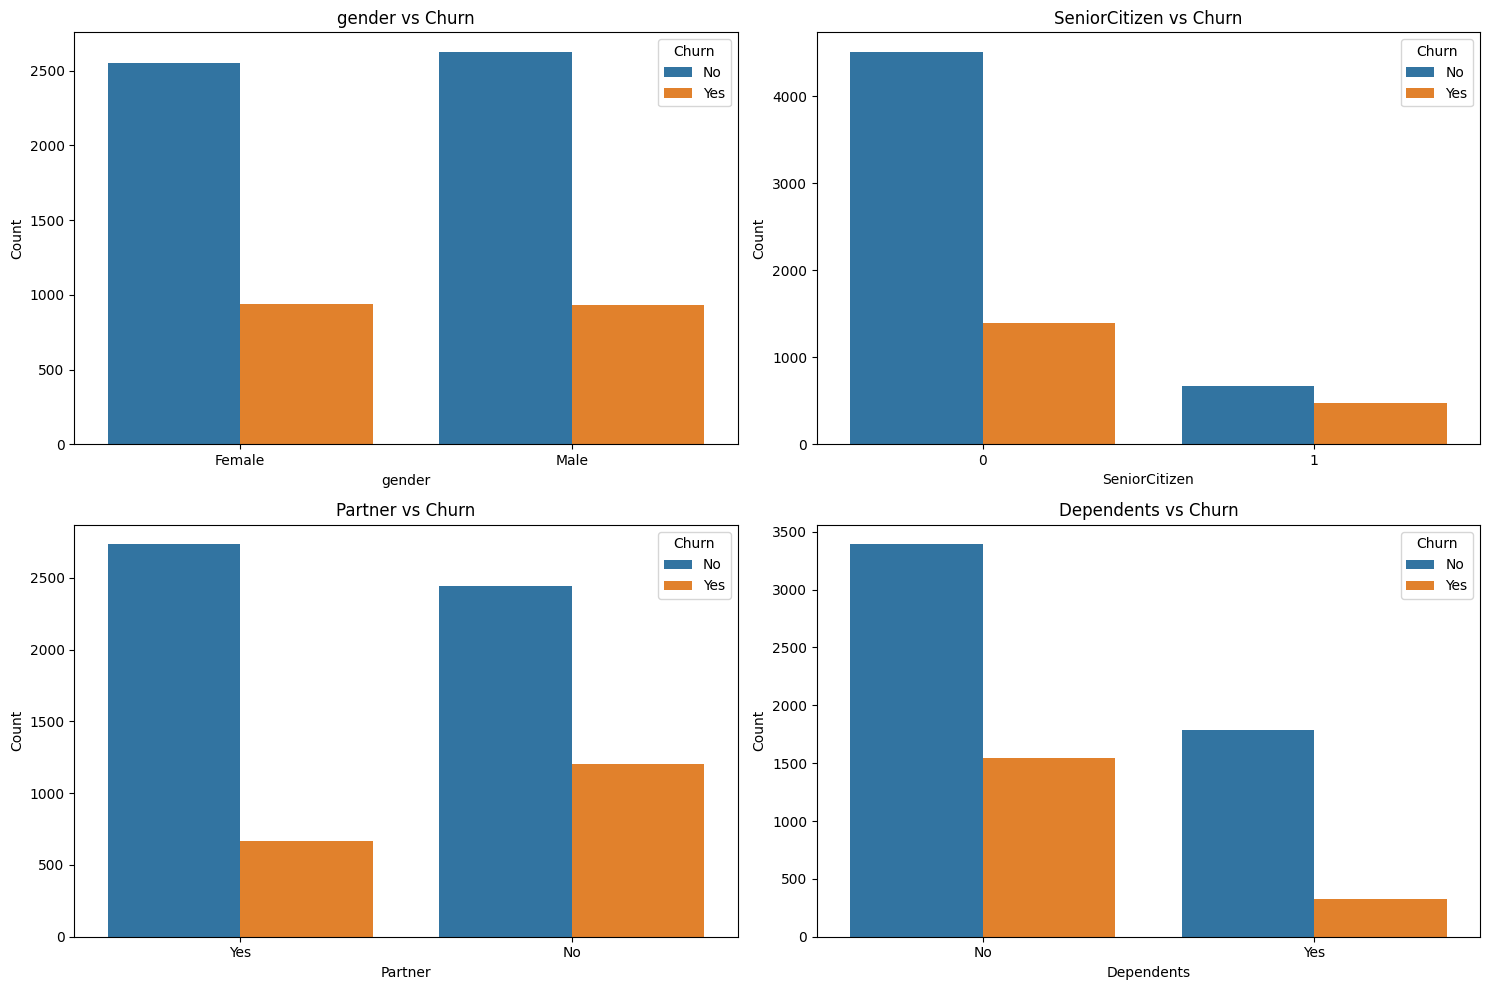

In [40]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(x=cols[i], data=df, hue='Churn', ax=ax)
        ax.set_title(f'{cols[i]} vs Churn')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

* Gender makes **no difference** whether the customer will churn ot not.
* Non-Senoir citizens churn more than.....

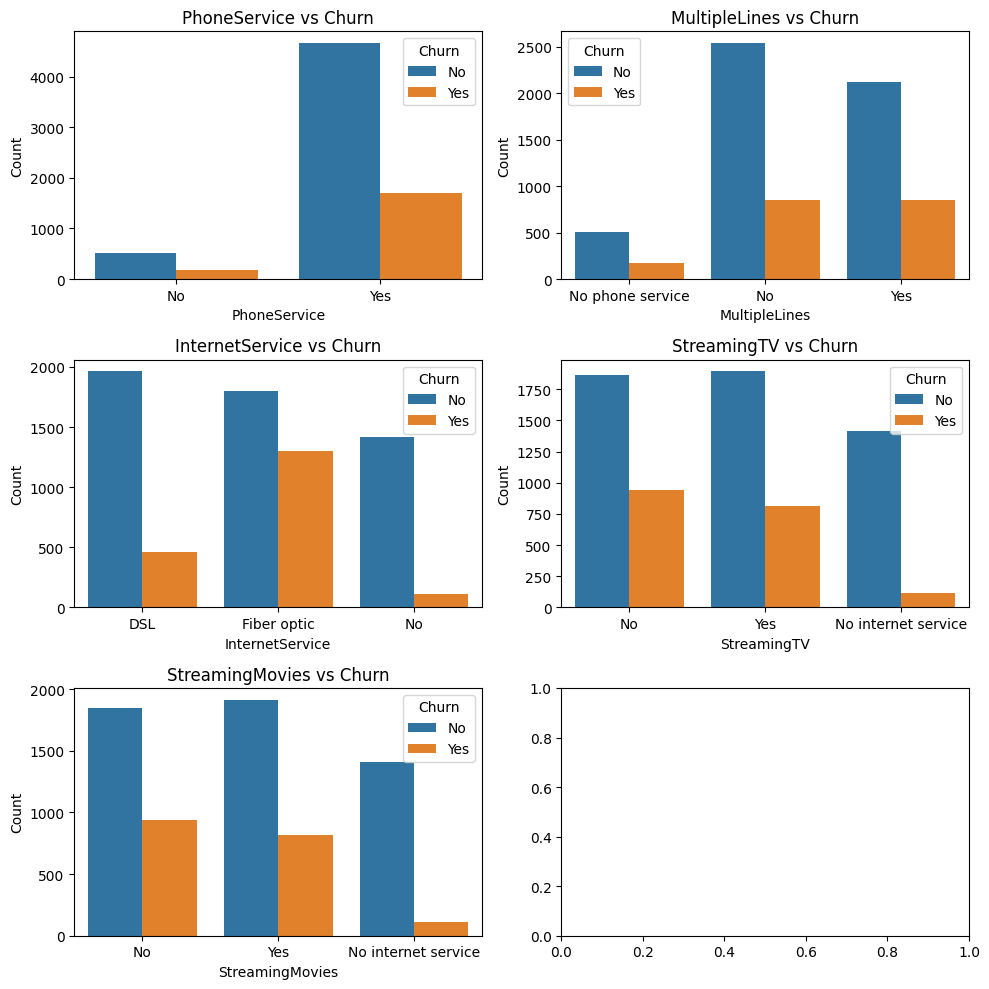

In [46]:
sv = df[['Churn', 'PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies']]
name_col = sv.columns[1:]
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    if i < len(name_col):
        sns.countplot(x=name_col[i], data=sv, hue='Churn', ax=ax)
        ax.set_title(f'{name_col[i]} vs Churn')
        ax.set_xlabel(name_col[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()